[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nils-holmberg/socs-qmd/blob/main/jnb/cca_cv_ibs.ipynb)

# computational image analysis
- computer vision perspective on [image bank sweden](https://imagebank.sweden.se/)
- organizational, brand communication, tourism
- visual communication, multimodal, video, web, games

### 1. descriptive analysis (manifest content)
- image [pixels](https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/web/isk/rgb-pixel-image-01.jpg), height, width, channels
- image normalization, resizing, color balance
- structural features, edges, spatial frequency
- foreground, background segmentation
- color analysis, color histograms

### 2. exploratory analysis (intermediary features)
- image clustering, dimensionality reduction
- structural similarity, cosine similarity
- keypoint detection, image stitching
- image embeddings, vectorization

### 3. inferential analysis (latent content)
- image classification (dog, no dog)
- natural object detection and localization
- optical character recognition, ocr
- humans: pose estimation, emotion, demographics

# sample image data

In [ ]:
# google drive, https://drive.google.com/file/d/1TYF9zggWHqWQIRaKyqe-dxAOetsVnT0I/view?usp=sharing
!gdown 'https://drive.google.com/uc?id=1TYF9zggWHqWQIRaKyqe-dxAOetsVnT0I'

In [ ]:
# unpack archive
!unzip image-content.zip

In [ ]:
import cv2
import os
import glob

input_directory = 'image-content'  # Replace with your input directory path
output_directory = 'image-normal'  # Replace with your output directory path

# Create the output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Iterate over all image files in the input directory
for image_path in glob.glob(os.path.join(input_directory, '*')):
    # Read the image
    image = cv2.imread(image_path)

    # Check if image is read correctly
    if image is not None:
        # Resize the image by a factor of 0.2
        resized_image = cv2.resize(image, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_AREA)

        # Extract the filename and create the output path
        filename = os.path.basename(image_path)
        output_path = os.path.join(output_directory, filename)

        # Write the resized image to the output directory in JPG format
        cv2.imwrite(output_path, resized_image)

print("Image resizing and saving completed.")


In [ ]:
!mkdir image-cluster
!cd image-normal/ && cp 0001.jpg 0002.jpg 0003.jpg 0004.jpg 0005.jpg 0006.jpg 0007.jpg 0031.jpg 0032.jpg 0033.jpg 0034.jpg 0035.jpg 0037.jpg 0039.jpg 0059.jpg 0060.jpg 0061.jpg 0065.jpg 0073.jpg ../image-cluster/

# 1. descriptive analysis (manifest content)
- image [pixels](https://raw.githubusercontent.com/nils-holmberg/cca-cv/main/web/isk/rgb-pixel-image-01.jpg), height, width, channels
- image normalization, resizing, color balance
- structural features, edges, spatial frequency
- foreground, background segmentation
- color analysis, color histograms

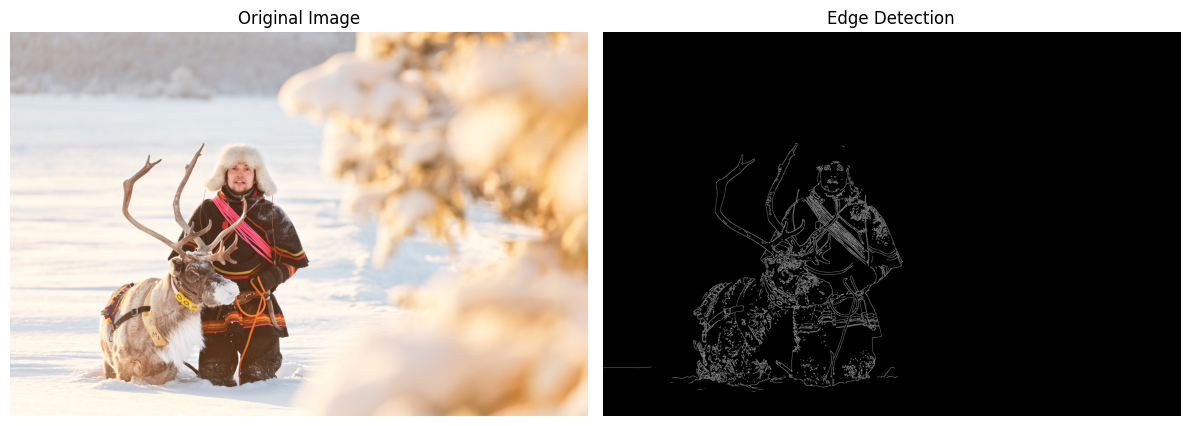

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Read the image using OpenCV
image_path = 'image-content/0006.jpg'
image = cv2.imread(image_path)  # Replace with your image path

# Convert the image to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform Canny edge detection
edges = cv2.Canny(gray_image, 100, 200)

# Convert BGR image to RGB for plotting
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Plot the original image and the edge-detected image side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot the original image
axes[0].imshow(image_rgb)
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the edge-detected image
axes[1].imshow(edges, cmap='gray')
axes[1].set_title('Edge Detection')
axes[1].axis('off')

plt.tight_layout()
plt.show()


### foreground, background [segmentation](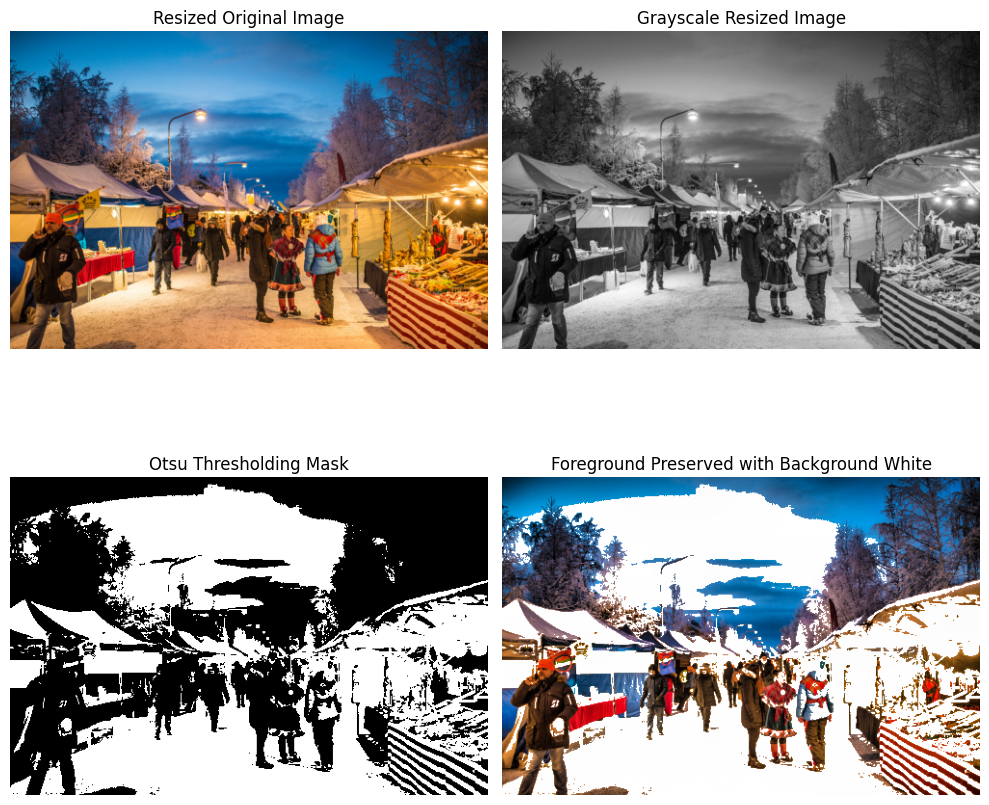)

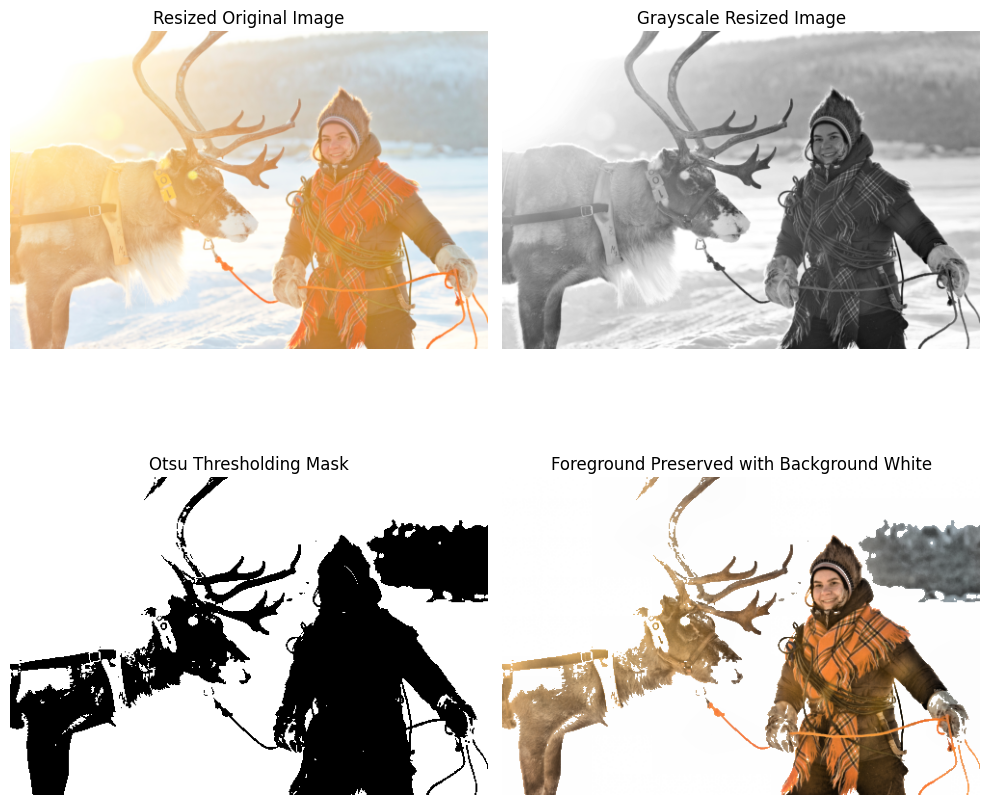

In [ ]:
from skimage import io, filters, color, transform, exposure
import matplotlib.pyplot as plt

# Load the original image
image_path = 'image-content/0016.jpg'
image_path = 'image-content/0007.jpg'
image = io.imread(image_path)

# Resize the image by a factor of 0.2
image_resized = transform.rescale(image, 0.2, anti_aliasing=True, multichannel=True)

# Convert the resized image to grayscale for thresholding
gray_resized_image = color.rgb2gray(image_resized)

# Apply a threshold (Otsu's method)
thresh = filters.threshold_otsu(gray_resized_image)
foreground_mask = gray_resized_image > thresh

# Create a mask to keep the foreground pixels and set the background to white
foreground_preserved = image_resized.copy()
foreground_preserved[foreground_mask] = [1, 1, 1]  # Set foreground to white

# Adjust the contrast of the preserved foreground image by performing histogram equalization
foreground_preserved_contrast = exposure.equalize_adapthist(foreground_preserved)

# Plot the results as a 2x2 plot
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Original resized image
ax[0, 0].imshow(image_resized)
ax[0, 0].set_title('Resized Original Image')
ax[0, 0].axis('off')

# Grayscale resized image
ax[0, 1].imshow(gray_resized_image, cmap='gray')
ax[0, 1].set_title('Grayscale Resized Image')
ax[0, 1].axis('off')

# Binary mask after Otsu's thresholding
ax[1, 0].imshow(foreground_mask, cmap='gray')
ax[1, 0].set_title('Otsu Thresholding Mask')
ax[1, 0].axis('off')

# Foreground preserved with background set to white
ax[1, 1].imshow(foreground_preserved_contrast)
ax[1, 1].set_title('Foreground Preserved with Background White')
ax[1, 1].axis('off')

plt.tight_layout()
plt.show()


### color analysis, color histograms

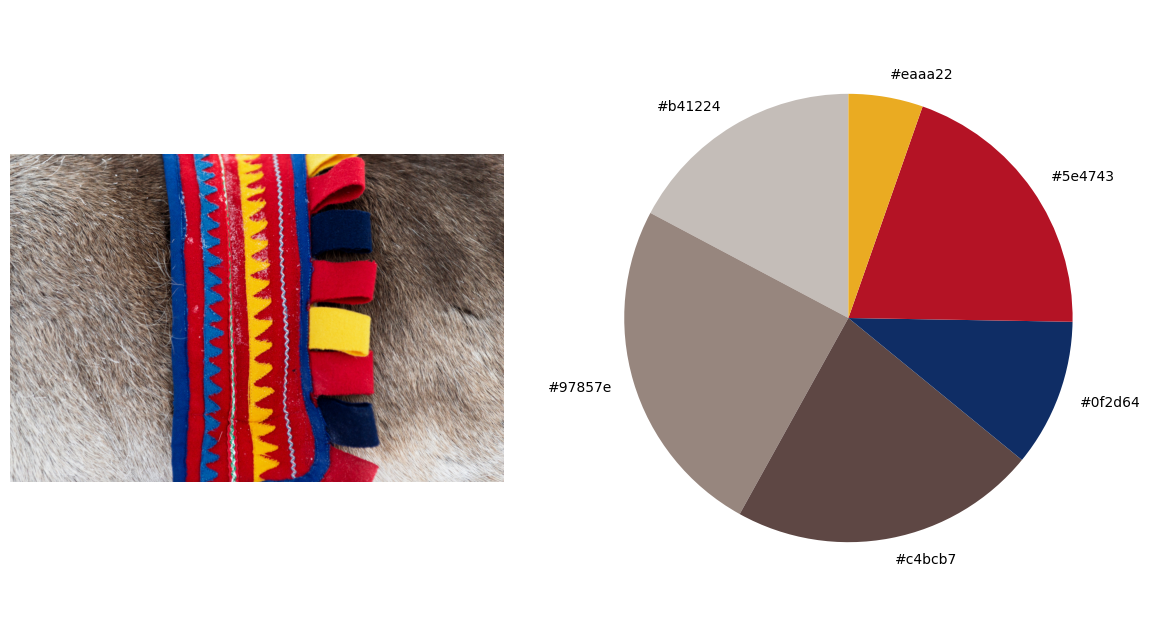

In [ ]:
from sklearn.cluster import KMeans
from collections import Counter
from matplotlib import pyplot as plt
import cv2

# Utility function, rgb to hex
def rgb2hex(rgb):
    hex = "#{:02x}{:02x}{:02x}".format(int(rgb[0]), int(rgb[1]), int(rgb[2]))
    return hex

def image_color_cluster(path, k=6):
    # Load image
    img_bgr = cv2.imread(path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

    # Resize image to speed up processing time
    resized_img_rgb = cv2.resize(img_rgb, (64, 64), interpolation=cv2.INTER_AREA)

    # Reshape the image to be a list of pixels
    img_list = resized_img_rgb.reshape((resized_img_rgb.shape[0] * resized_img_rgb.shape[1], 3))

    # Cluster the pixels and assign labels
    clt = KMeans(n_clusters=k)
    labels = clt.fit_predict(img_list)

    # Count labels to find most popular
    label_counts = Counter(labels)
    total_count = sum(label_counts.values())

    # Subset out most popular centroid
    center_colors = list(clt.cluster_centers_)
    ordered_colors = [center_colors[i]/255 for i in label_counts.keys()]
    color_labels = [rgb2hex(ordered_colors[i]*255) for i in label_counts.keys()]

    # Plots
    plt.figure(figsize=(14, 8))
    plt.subplot(121)  # 1 row, 2 columns, 1st subplot = original image
    plt.imshow(img_rgb)
    plt.axis('off')

    plt.subplot(122)  # 1 row, 2 columns, 2nd subplot = color clustering plot
    plt.pie(label_counts.values(), labels=color_labels, colors=ordered_colors, startangle=90)
    plt.axis('equal')

    plt.show()

# Read the image using OpenCV
image_path = 'image-content/0045.jpg'
image_path = 'image-content/0009.jpg'
image_color_cluster(image_path, k=6)


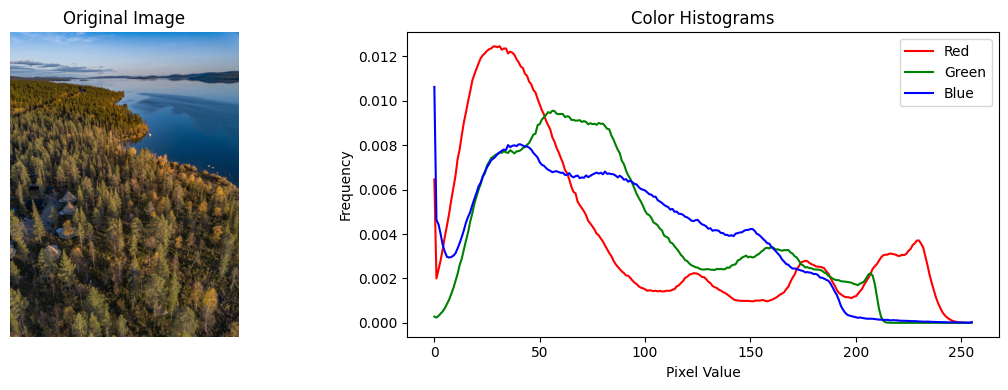

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the image using OpenCV
image_path = 'image-content/0045.jpg'
image_path = 'image-content/0009.jpg'
image_path = 'image-content/0037.jpg'
image = cv2.imread(image_path)  # Replace with your image path

# Calculate color histograms for each channel
hist_r = cv2.calcHist([image], [0], None, [256], [0, 256])
hist_g = cv2.calcHist([image], [1], None, [256], [0, 256])
hist_b = cv2.calcHist([image], [2], None, [256], [0, 256])

# Normalize histograms
hist_r /= hist_r.sum()
hist_g /= hist_g.sum()
hist_b /= hist_b.sum()

# Create subplots for the original image and histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Plot the original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Original Image')
axes[0].axis('off')

# Plot the color histograms using Seaborn
sns.lineplot(x=np.arange(256), y=hist_r.squeeze(), color='red', ax=axes[1], label='Red')
sns.lineplot(x=np.arange(256), y=hist_g.squeeze(), color='green', ax=axes[1], label='Green')
sns.lineplot(x=np.arange(256), y=hist_b.squeeze(), color='blue', ax=axes[1], label='Blue')
axes[1].set_title('Color Histograms')
axes[1].set_xlabel('Pixel Value')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Show the plots
plt.tight_layout()
plt.show()


# 2. exploratory analysis (intermediary features)
- image clustering, dimensionality reduction
- structural similarity, cosine similarity
- keypoint detection, image stitching
- image embeddings, vectorization

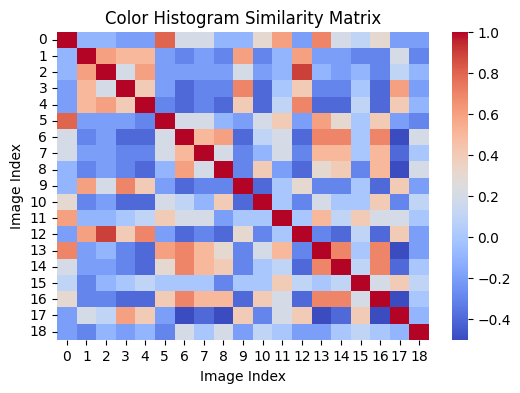

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def compute_histogram(image, bins=256):
    """Compute the color histogram for an image."""
    histogram = [cv2.calcHist([image], [i], None, [bins], [0, 256]) for i in range(3)]
    return np.concatenate(histogram).flatten()

def calculate_similarity(hist_list):
    """Calculate histogram similarity matrix."""
    num_images = len(hist_list)
    similarity_matrix = np.zeros((num_images, num_images))

    for i in range(num_images):
        for j in range(num_images):
            similarity = cv2.compareHist(hist_list[i], hist_list[j], cv2.HISTCMP_CORREL)
            similarity_matrix[i, j] = similarity

    return similarity_matrix

# Directory containing images
image_directory = 'image-cluster'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)
similarity_matrix = np.around(similarity_matrix, decimals=1)

# Plotting the similarity matrix
plt.figure(figsize=(6, 4))
#sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')
sns.heatmap(similarity_matrix, annot=False, cmap='coolwarm')
plt.title('Color Histogram Similarity Matrix')
plt.xlabel('Image Index')
plt.ylabel('Image Index')
plt.show()


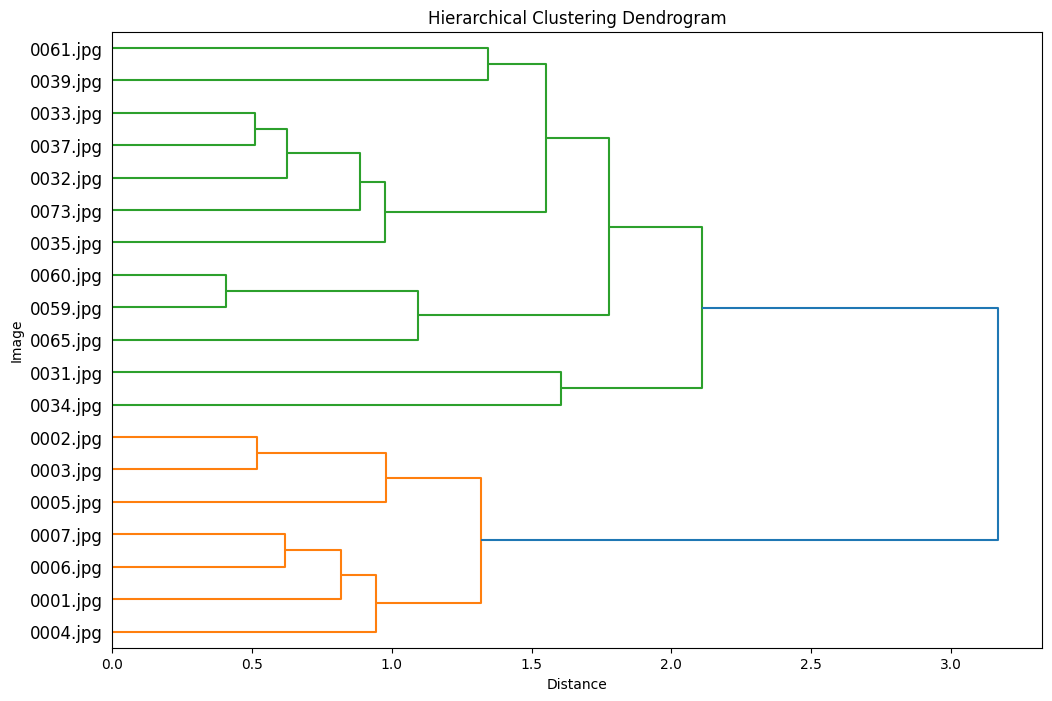

In [ ]:
import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Function to compute the color histogram and similarity matrix
# ... (same functions `compute_histogram` and `calculate_similarity` as before)

# Directory containing images
image_directory = 'image-cluster'

# Load and process images
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
histograms = []

for file in image_files:
    image_path = os.path.join(image_directory, file)
    image = cv2.imread(image_path)
    if image is not None:
        hist = compute_histogram(image)
        histograms.append(hist)

# Calculate the similarity matrix
similarity_matrix = calculate_similarity(histograms)

# Perform hierarchical clustering
Z = linkage(1 - similarity_matrix, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=image_files, orientation='right')
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Image')
plt.show()


# 3. inferential analysis (latent content)
- image classification (dog, no dog)
- natural object detection and localization
- optical character recognition, ocr
- humans: pose estimation, emotion, demographics

### image classification

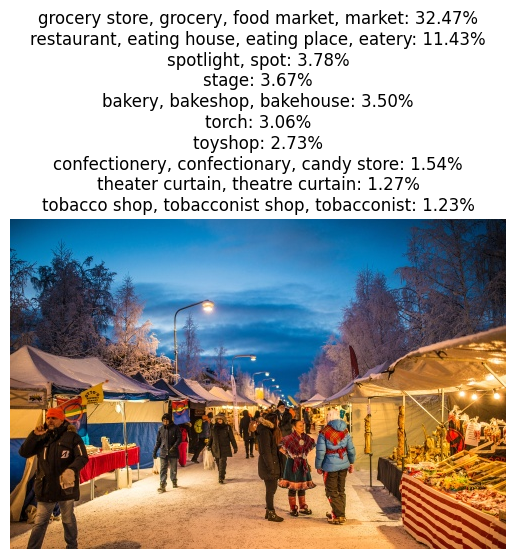

In [ ]:
from transformers import ViTFeatureExtractor, ViTForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the feature extractor and model
feature_extractor = ViTFeatureExtractor.from_pretrained('google/vit-base-patch16-224')
model = ViTForImageClassification.from_pretrained('google/vit-base-patch16-224')

# Load an image from a local file
local_image_path = "image-normal/0016.jpg"  # Replace with your local image path
image = Image.open(local_image_path)

# Prepare the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform image classification
outputs = model(**inputs)
logits = outputs.logits

# Convert logits to probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# Extract the top probabilities and their indices (top 5 predictions)
top_probs, top_indices = torch.topk(probs, 10, sorted=True)

# Prepare list for top 5 labels with their probabilities
top_label_prob_list = []

for idx, prob in zip(top_indices[0], top_probs[0]):
    label = model.config.id2label.get(idx.item(), f"Label {idx.item()}")
    top_label_prob_list.append(f"{label}: {prob * 100:.2f}%")

# Plot the image with the inference results as a caption
plt.imshow(image)
plt.axis('off')
plt.title('\n'.join(top_label_prob_list))
plt.show()


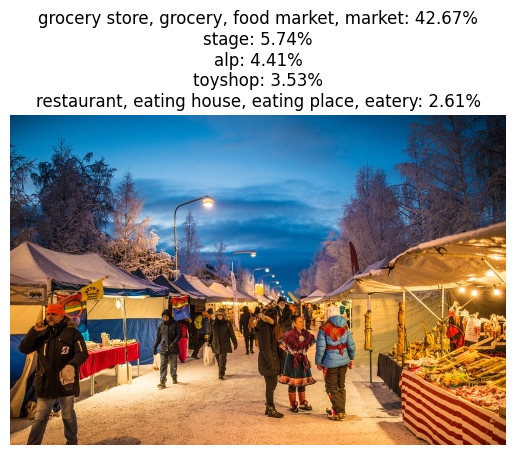

In [ ]:
from transformers import BeitFeatureExtractor, BeitForImageClassification
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Load the feature extractor and model
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224')
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224')

# Load an image from a local file
local_image_path = "image-normal/0016.jpg"  # Replace with your local image path
image = Image.open(local_image_path)

# Prepare the image
inputs = feature_extractor(images=image, return_tensors="pt")

# Perform image classification
outputs = model(**inputs)
logits = outputs.logits

# Convert logits to probabilities
probs = torch.nn.functional.softmax(logits, dim=-1)

# Extract the top probabilities and their indices (top 5 predictions)
top_probs, top_indices = torch.topk(probs, 5, sorted=True)

# Prepare list for top 5 labels with their probabilities
top_label_prob_list = []

for idx, prob in zip(top_indices[0], top_probs[0]):
    label = model.config.id2label.get(idx.item(), f"Label {idx.item()}")
    top_label_prob_list.append(f"{label}: {prob.item() * 100:.2f}%")

# Plot the image with the inference results as a caption
plt.imshow(image)
plt.axis('off')
plt.title('\n'.join(top_label_prob_list))
plt.show()


In [ ]:
import os
import pandas as pd
from transformers import BeitFeatureExtractor, BeitForImageClassification
from PIL import Image
import torch

# Load the feature extractor and model
feature_extractor = BeitFeatureExtractor.from_pretrained('microsoft/beit-base-patch16-224')
model = BeitForImageClassification.from_pretrained('microsoft/beit-base-patch16-224')

# Specify your folder path here
folder_path = 'image-cluster'

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Filename', 'Label', 'Probability'])

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Load an image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Prepare the image
        inputs = feature_extractor(images=image, return_tensors="pt")

        # Perform image classification
        outputs = model(**inputs)
        logits = outputs.logits

        # Convert logits to probabilities
        probs = torch.nn.functional.softmax(logits, dim=-1)

        # Extract the top probabilities and their indices (top 5 predictions)
        top_probs, top_indices = torch.topk(probs, 5, sorted=True)

        # Prepare list for top 5 labels with their probabilities
        top_label_prob_list = []
        for idx, prob in zip(top_indices[0], top_probs[0]):
            label = model.config.id2label.get(idx.item(), f"Label {idx.item()}")
            top_label_prob_list.append({'Filename': filename, 'Label': label, 'Probability': prob.item()})

        # Append results to the DataFrame using concat
        temp_df = pd.DataFrame(top_label_prob_list)
        df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
print(df)

# Optional: Save the DataFrame to a CSV file
df.to_csv('class-labels.csv', index=False)


    Filename                                              Label  Probability
0   0059.jpg                                            spatula     0.479492
1   0059.jpg                        frying pan, frypan, skillet     0.325256
2   0059.jpg                                                wok     0.052813
3   0059.jpg                                         Dutch oven     0.008102
4   0059.jpg                                    hot pot, hotpot     0.006294
..       ...                                                ...          ...
90  0031.jpg                                      mountain tent     0.493369
91  0031.jpg  worm fence, snake fence, snake-rail fence, Vir...     0.026289
92  0031.jpg                                lumbermill, sawmill     0.015244
93  0031.jpg                                               yurt     0.014754
94  0031.jpg                                               pole     0.013145

[95 rows x 3 columns]


### image captioning

people walking through a market at night


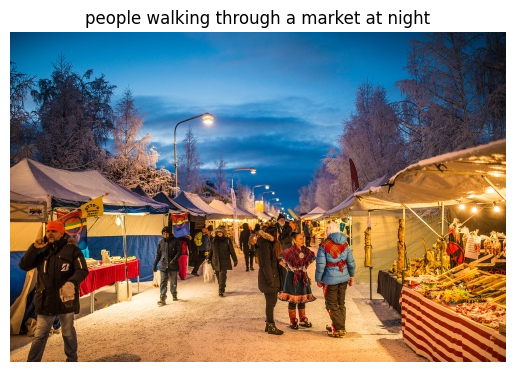

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import matplotlib.pyplot as plt

# Load the processor and model
processor = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')
model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')

# Load an image from a local file
local_image_path = "image-normal/0016.jpg"  # Replace with your local image path
image = Image.open(local_image_path)

# Prepare the image
inputs = processor(images=image, return_tensors="pt")

# Generate captions
outputs = model.generate(**inputs)

# Decode and print the caption
caption = processor.decode(outputs[0], skip_special_tokens=True)
print(caption)

# Plot the image with the caption as the title
plt.imshow(image)
plt.title(caption)
plt.axis('off')  # Turn off axis numbers and ticks
plt.show()


In [ ]:
import os
import pandas as pd
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image

# Load the processor and model
processor = BlipProcessor.from_pretrained('Salesforce/blip-image-captioning-base')
model = BlipForConditionalGeneration.from_pretrained('Salesforce/blip-image-captioning-base')

# Specify your folder path here
folder_path = 'image-cluster'

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Filename', 'Caption'])

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Load an image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Prepare the image
        inputs = processor(images=image, return_tensors="pt")

        # Generate captions with specified max_new_tokens
        outputs = model.generate(**inputs, max_new_tokens=30)

        # Decode and print the caption
        caption = processor.decode(outputs[0], skip_special_tokens=True)
        print(f"Caption for {filename}: {caption}")

        # Append results to the DataFrame using concat
        temp_df = pd.DataFrame({'Filename': [filename], 'Caption': [caption]})
        df = pd.concat([df, temp_df], ignore_index=True)

# Display the DataFrame
#print(df)

# Optional: Save the DataFrame to a CSV file
# df.to_csv('/path/to/save/captions.csv', index=False)


### image, text embeddings

Results for the single image:
{'people at a market': 0.24959087371826172, 'pink sofa': 0.1170586571097374}


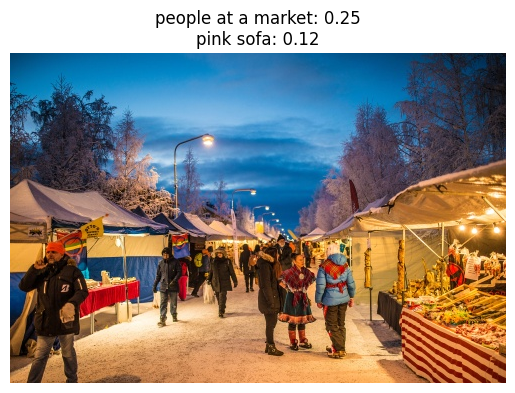

In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import torch
import matplotlib.pyplot as plt

# Function to compute cosine similarity
def cosine_similarity(embeddings1, embeddings2):
    return torch.nn.functional.cosine_similarity(embeddings1, embeddings2).item()

# Load the model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

# Load an image from a local file
local_image_path = "image-normal/0016.jpg"  # Replace with your local image path
image = Image.open(local_image_path)

# Text strings to compare
texts = ["people at a market", "pink sofa"]

# Process the image and texts
inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

# Get the image and text embeddings
image_embeddings = model.get_image_features(pixel_values=inputs['pixel_values'])
text_embeddings = model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

# Calculate cosine similarity
results = {}
for i, text in enumerate(texts):
    similarity = cosine_similarity(image_embeddings, text_embeddings[i].unsqueeze(0))
    results[text] = similarity

print("Results for the single image:")
print(results)

# Plot the image with each text and its confidence score as caption
plt.imshow(image)
plt.axis('off')  # Turn off axis numbers and ticks
plt.title('\n'.join([f"{text}: {results[text]:.2f}" for text in texts]))
plt.show()


In [ ]:
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
import requests
import torch
import pandas as pd
import os

# Function to compute cosine similarity
def cosine_similarity(embeddings1, embeddings2):
    return torch.nn.functional.cosine_similarity(embeddings1, embeddings2).item()

# Load the model and processor
model = CLIPModel.from_pretrained('openai/clip-vit-base-patch32')
processor = CLIPProcessor.from_pretrained('openai/clip-vit-base-patch32')

# Text strings to compare
texts = ["indoors handicraft", "winter landscape snow", "summer landscape green"]

# Initialize an empty DataFrame
df = pd.DataFrame(columns=['Filename', 'Text', 'Confidence'])

# Specify your folder path here
folder_path = 'image-cluster'

# Iterate over each file in the folder
for filename in os.listdir(folder_path):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif')):
        # Load an image
        image_path = os.path.join(folder_path, filename)
        image = Image.open(image_path)

        # Process the image and texts
        inputs = processor(text=texts, images=image, return_tensors="pt", padding=True)

        # Get the image and text embeddings
        image_embeddings = model.get_image_features(pixel_values=inputs['pixel_values'])
        text_embeddings = model.get_text_features(input_ids=inputs['input_ids'], attention_mask=inputs['attention_mask'])

        # Calculate and store cosine similarity
        for text in texts:
            similarity = cosine_similarity(image_embeddings, text_embeddings[texts.index(text)].unsqueeze(0))
            df = df.append({'Filename': filename, 'Text': text, 'Confidence': similarity}, ignore_index=True)

# Display the DataFrame
print("Results for all images in the folder:")
print(df)

# Optional: Save the DataFrame to a CSV file
# df.to_csv('/path/to/save/results.csv', index=False)


### human content features

In [ ]:
import cv2
import os

def save_face_patches(input_dir, output_dir, margin=20):
    # Create the output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # Load the Haar Cascade for face detection
    #face_cascade = cv2.CascadeClassifier(cascade_path)
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    # Iterate over each file in the input directory
    for filename in os.listdir(input_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            image_path = os.path.join(input_dir, filename)
            image = cv2.imread(image_path)

            if image is not None:
                gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
                faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

                # Save each face as a separate file
                for i, (x, y, w, h) in enumerate(faces):
                    face = image[max(y - margin, 0):y + h + margin, max(x - margin, 0):x + w + margin]
                    face_file_name = f"{os.path.splitext(filename)[0]}_face{i}.jpg"
                    cv2.imwrite(os.path.join(output_dir, face_file_name), face)

# Path to the input directory, output directory, and Haar Cascade file
input_directory = 'image-cluster'
output_directory = 'image-humans'
haar_cascade_path = 'path/to/haarcascade_frontalface_default.xml'  # Update this path
#face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

save_face_patches(input_directory, output_directory)


In [ ]:
!pip install deepface

Action: race: 100%|██████████| 4/4 [00:01<00:00,  2.17it/s]

         Filename   Emotion Age Gender Ethnicity
0  0007_face0.jpg     happy  24    Man     white
1  0039_face0.jpg  surprise  42    Man     white


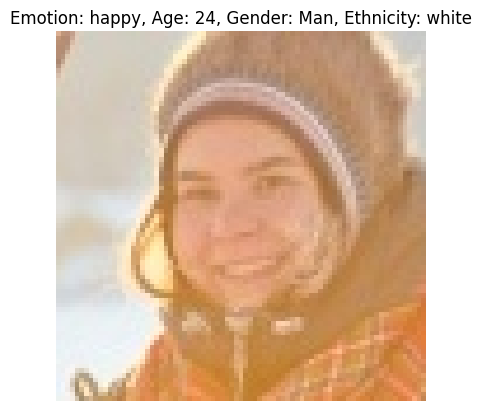

In [ ]:
import os
import pandas as pd
from deepface import DeepFace
from PIL import Image
import matplotlib.pyplot as plt

# Directory containing face patches
face_patches_directory = 'image-humans'  # Replace with your directory path

# Initialize an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Filename', 'Emotion', 'Age', 'Gender', 'Ethnicity'])

# Iterate over each face patch in the directory
for filename in os.listdir(face_patches_directory):
    if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
        file_path = os.path.join(face_patches_directory, filename)

        # Analyze the face patch for emotion, age, gender, and ethnicity
        try:
            analysis = DeepFace.analyze(file_path, actions=['emotion', 'age', 'gender', 'race'], enforce_detection=False)[0]
            # Append results to the DataFrame
            results_df = results_df.append({
                'Filename': filename,
                'Emotion': analysis['dominant_emotion'],
                'Age': analysis['age'],
                'Gender': analysis['dominant_gender'],
                'Ethnicity': analysis['dominant_race']
            }, ignore_index=True)
        except Exception as e:
            print(f"Error processing file {filename}: {e}")

# Display the DataFrame
print(results_df)

# Plot a single image with inference results as caption
# Replace with a specific file name from your face patches
image_path = os.path.join(face_patches_directory, '0007_face0.jpg')
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')

# Get the analysis results for the specific image
specific_results = results_df[results_df['Filename'] == '0007_face0.jpg'].iloc[0]
caption = f"Emotion: {specific_results['Emotion']}, Age: {specific_results['Age']}, Gender: {specific_results['Gender']}, Ethnicity: {specific_results['Ethnicity']}"
plt.title(caption)
plt.show()
